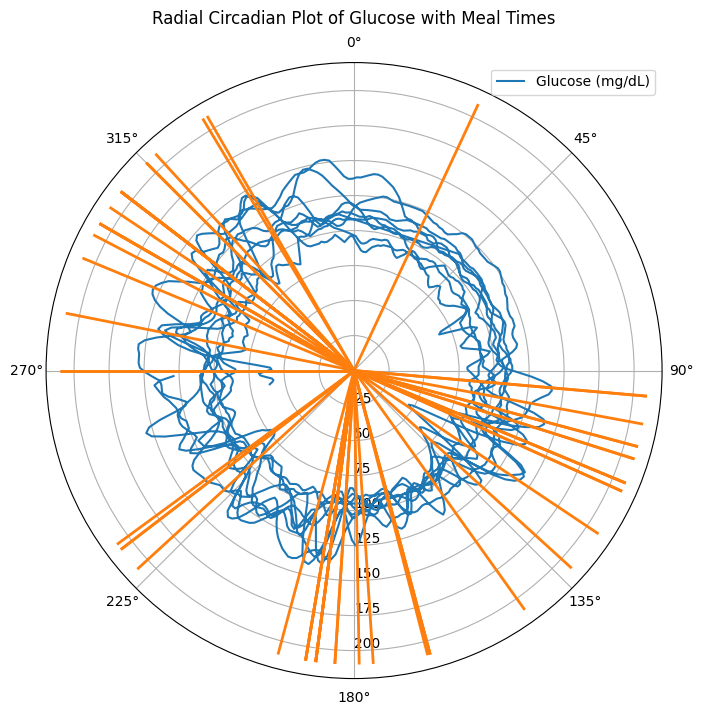

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load data
dexcom = pd.read_csv('/Users/evelynzhang/Downloads/Dexcom_001.csv', parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'], 
            usecols=['Timestamp (YYYY-MM-DDThh:mm:ss)', 'Glucose Value (mg/dL)'])
foodlog = pd.read_csv('/Users/evelynzhang/Downloads/Food_Log_001.csv', parse_dates=['time_begin'])

# Rename for convenience
dexcom.rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)': 'timestamp', 
    'Glucose Value (mg/dL)': 'glucose'}, inplace=True)

# Compute angle (radians) for each timestamp (0 at midnight, clockwise)
dexcom['hour_frac'] = dexcom['timestamp'].dt.hour + dexcom_clean_clean_clean['timestamp'].dt.minute / 60
dexcom['angle'] = 2 * np.pi * dexcom['hour_frac'] / 24
dexcom['radius'] = dexcom['glucose']

# Compute meal tick angles
foodlog['hour_frac'] = foodlog['time_begin'].dt.hour + foodlog['time_begin'].dt.minute / 60
foodlog['angle'] = 2 * np.pi * foodlog['hour_frac'] / 24

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Plot glucose radial line
ax.plot(dexcom['angle'], dexcom['radius'], color='tab:blue', linewidth=1.5, label='Glucose (mg/dL)')

# Plot meal ticks
max_radius = dexcom['radius'].max()
for _, row in foodlog.iterrows():
    ax.vlines(row['angle'], 0, max_radius * 1.05, color='tab:orange', linewidth=2)

# Formatting
ax.set_theta_zero_location('N')  # midnight at top
ax.set_theta_direction(-1)       # clockwise
ax.set_rlabel_position(180)      # radial labels on left

# Set radial limits slightly above max glucose for ticks
ax.set_ylim(0, max_radius * 1.1)

# Titles and legend
ax.set_title('Radial Circadian Plot of Glucose with Meal Times', va='bottom')
ax.legend(loc='upper right')

plt.show()

In [4]:
import pandas as pd

# 1. Load your original files (adjust paths as needed)
dexcom = pd.read_csv(
    '/Users/evelynzhang/Documents/GitHub/dsc106_interactive_design/csvs/Dexcom_001.csv',
    parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
    usecols=['Timestamp (YYYY-MM-DDThh:mm:ss)', 'Glucose Value (mg/dL)']
).rename(columns={
    'Timestamp (YYYY-MM-DDThh:mm:ss)': 'timestamp',
    'Glucose Value (mg/dL)': 'glucose'
})

foodlog = pd.read_csv(
    '/Users/evelynzhang/Documents/GitHub/dsc106_interactive_design/csvs/Food_Log_001.csv',
    parse_dates=['time_begin']
)

# 2. Select only the columns your D3 code needs
dexcom_clean = dexcom[['timestamp', 'glucose']]
foodlog_clean = foodlog[['time_begin', 'total_carb', 'protein', 'sugar', 'calorie','dietary_fiber','total_fat']]

# 3. Save to new CSVs
dexcom_clean.to_csv('/Users/evelynzhang/Documents/GitHub/dsc106_interactive_design/csvs/dexcom_clean.csv', index=False)
foodlog_clean.to_csv('/Users/evelynzhang/Documents/GitHub/dsc106_interactive_design/csvs/foodlog_clean.csv', index=False)

print("Saved dexcom_clean.csv and foodlog_clean.csv!")


Saved dexcom_clean.csv and foodlog_clean.csv!


In [23]:
dexcom_clean  = dexcom.dropna()
foodlog_clean = foodlog.dropna()

In [20]:
dexcom

,timestamp,glucose,hour_frac,angle,radius
0,NaT,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2568,2020-02-22 17:33:23,139.0,17.550000,4.594579,139.0
2569,2020-02-22 17:38:23,141.0,17.633333,4.616396,141.0
2570,2020-02-22 17:43:23,143.0,17.716667,4.638212,143.0
2571,2020-02-22 17:48:22,139.0,17.800000,4.660029,139.0


In [ ]:
de

In [27]:
dexcom_clean

,timestamp,glucose,hour_frac,angle,radius,hour
12,2020-02-13 17:23:32,61.0,17.383333,4.550946,61.0,17
13,2020-02-13 17:28:32,59.0,17.466667,4.572763,59.0,17
14,2020-02-13 17:33:32,58.0,17.550000,4.594579,58.0,17
15,2020-02-13 17:38:32,59.0,17.633333,4.616396,59.0,17
16,2020-02-13 17:43:31,63.0,17.716667,4.638212,63.0,17
...,...,...,...,...,...,...
2568,2020-02-22 17:33:23,139.0,17.550000,4.594579,139.0,17
2569,2020-02-22 17:38:23,141.0,17.633333,4.616396,141.0,17
2570,2020-02-22 17:43:23,143.0,17.716667,4.638212,143.0,17
2571,2020-02-22 17:48:22,139.0,17.800000,4.660029,139.0,17


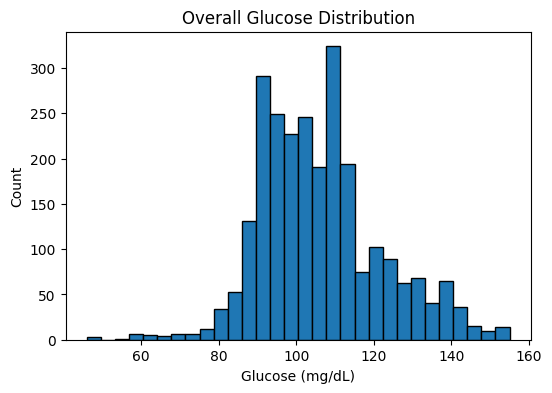

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
plt.hist(dexcom_clean['glucose'], bins=30, edgecolor='k')
plt.xlabel('Glucose (mg/dL)'); plt.ylabel('Count')
plt.title('Overall Glucose Distribution')
plt.show()


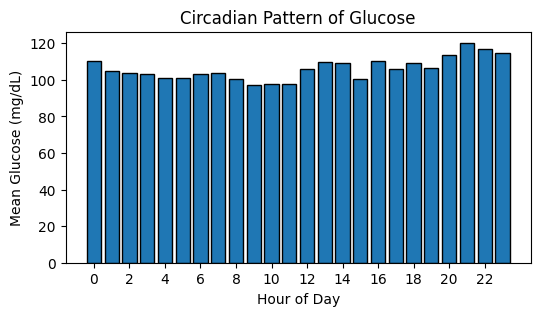

In [29]:
# Or, if you’re fine with the original dexcom (which already has hour):
hourly = dexcom_clean.groupby('hour')['glucose'].mean()

# Then plot:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.bar(hourly.index, hourly.values, edgecolor='k')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Glucose (mg/dL)')
plt.title('Circadian Pattern of Glucose')
plt.xticks(range(0,24,2))
plt.show()



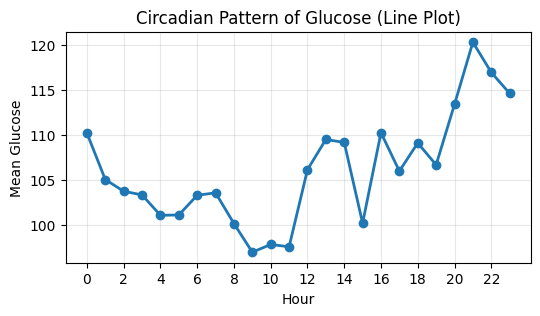

In [31]:
plt.figure(figsize=(6,3))
plt.plot(hourly.index, hourly.values, marker='o', linewidth=2)
plt.xlabel('Hour'); plt.ylabel('Mean Glucose')
plt.title('Circadian Pattern of Glucose (Line Plot)')
plt.xticks(range(0,24,2))
plt.grid(alpha=0.3)
plt.show()



In [36]:
foodlog

,date,time,time_begin,time_end,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,hour_frac,angle
0,2020-02-13,18:00:00,2020-02-13 18:00:00,NaN,Berry Smoothie,20.00,fluid ounce,Strawberry Smoothie,456.0,85.0,1.7,83.0,16.0,3.3,18.000000,4.712389
1,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Chicken Leg,1.00,NaN,chicken leg,475.0,0.0,0.0,0.0,62.0,23.0,20.500000,5.366887
2,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Asparagus,4.00,NaN,Asparagus,13.0,2.5,1.2,0.8,1.4,0.1,20.500000,5.366887
3,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Natrel Lactose Free 2 Percent,8.00,fluid ounce,(Natrel) Lactose Free 2% Partly Skimmed Milk,120.0,9.0,NaN,8.0,12.0,NaN,7.166667,1.876229
4,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Standard Breakfast,0.75,cup,"(Kellogg's) Frosted Flakes, Cereal",110.0,26.0,NaN,10.0,1.0,NaN,7.166667,1.876229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-02-21,12:30:00,2020-02-21 12:30:00,NaN,Chicken Salad,0.50,cup,Chicken Salad,254.0,3.3,NaN,2.4,19.0,NaN,12.500000,3.272492
57,2020-02-21,12:30:00,2020-02-21 12:30:00,NaN,Pita Bread,7.00,NaN,Small Pita Bread,539.0,109.0,NaN,2.5,18.0,NaN,12.500000,3.272492
58,2020-02-21,19:50:00,2020-02-21 19:50:00,NaN,Cheese Pita,5.00,NaN,Generic - Serbian Cheese Pita,640.0,95.0,NaN,0.0,30.0,NaN,19.833333,5.192355
59,2020-02-21,20:00:00,2020-02-21 20:00:00,NaN,Spinach Smoothie,20.00,fluid ounce,Spinach Smoothie,308.0,69.0,NaN,38.0,7.2,NaN,20.000000,5.235988


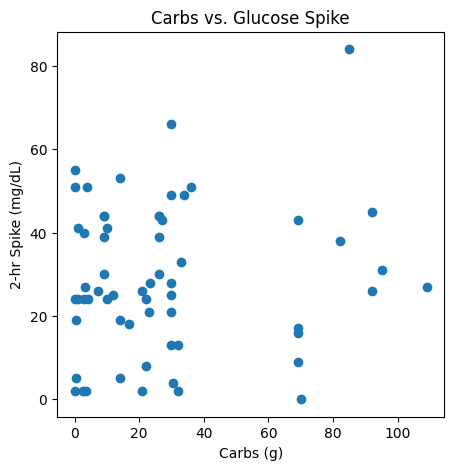

In [37]:
peaks = []
for _,m in foodlog.iterrows():
    window = dexcom_clean[(dexcom_clean['timestamp']>=m.time_begin)&(dexcom_clean['timestamp']<=m.time_begin+pd.Timedelta(hours=2))]
    if not window.empty:
        peaks.append((m.logged_food, m.total_carb, window['glucose'].max()-window['glucose'].iloc[0]))
df = pd.DataFrame(peaks, columns=['meal','carbs','spike'])
plt.figure(figsize=(5,5))
plt.scatter(df['carbs'], df['spike'])
plt.xlabel('Carbs (g)'); plt.ylabel('2-hr Spike (mg/dL)')
plt.title('Carbs vs. Glucose Spike')
plt.show()